<a href="https://colab.research.google.com/github/revaza05/DataScience_learning/blob/master/Linear_Regresion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
# load data from sequence_for_L_Regresion.csv file
data = np.genfromtxt('sequence_for_L_Regresion.csv').reshape(2,50)

In [6]:
# define x and y and give them values
x = data[0,:]
y = data[1,:]

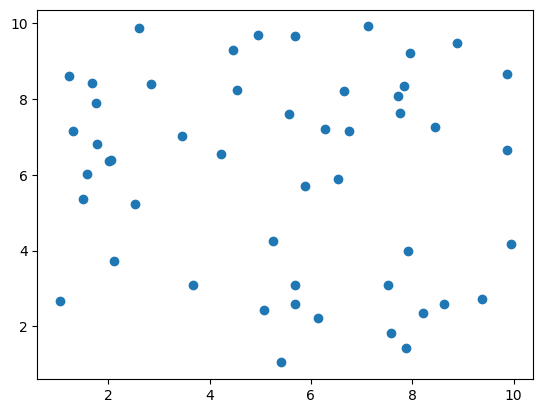

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
# generating regresion coeficients
poly_1 = np.polyfit(x,y,1)
poly_1  # this array represents coeficients

array([-0.11787609,  6.66266202])

In [9]:
poly_1 = np.poly1d(poly_1)
poly_1.c

array([-0.11787609,  6.66266202])

In [10]:
yhat_1 = poly_1(x)

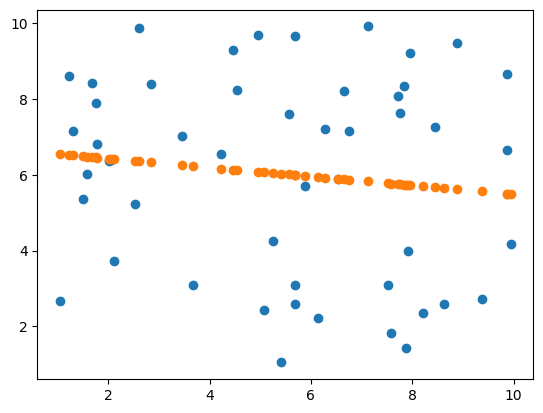

In [11]:
plt.scatter(x,y)

plt.scatter(x,yhat_1)

plt.show()

In [ ]:


# Residuals



In [12]:
# RSS
# for coeficient optimisation B0, B1
rss = round(np.power(y-yhat_1,2).sum(),3)  # მიღებული ჯამი გამოხატავს ცდომილბას, თუ ეს რიცხვი პატარაა ე.ი. კარგი მოდელი ააგო

In [31]:
# MSS
# for coeficient optimisation B0, B1
mss = round(np.power(y-yhat_1,2).mean(),3)
mss

6.745

In [14]:
# TSS
# for coeficient optimisation B0, B1
tss = round(np.power(y-y.mean(),2).sum(),3)

In [15]:
# R2
1-(rss/tss)

0.014611698708584031

In [1]:
# Train-Test Split
# by it we want to split our data into train data and test data
# in this case we splitted our data: 80 percent as train data and 20 percent as test data

In [16]:
train_test_ratio = 0.80  # percentage

In [17]:
train_cnt = round(train_test_ratio*x.shape[0])
train_cnt

40

In [19]:
train_x, test_x = x[:train_cnt], x[train_cnt:]
train_y, test_y = y[:train_cnt], y[train_cnt:]

In [21]:
poly_1 = np.polyfit(train_x, train_y,1)
poly_1

array([-0.15107878,  6.8559771 ])

In [24]:
poly_1 = np.poly1d(poly_1)
poly_1

poly1d([-0.15107878,  6.8559771 ])

In [26]:
test_yhat_1 = poly_1(test_x)

array([6.30154018, 6.6011223 , 6.65870084, 5.90717274, 5.51399052,
       6.16877683, 5.99828307, 6.53568993, 5.61513459, 5.84952033])

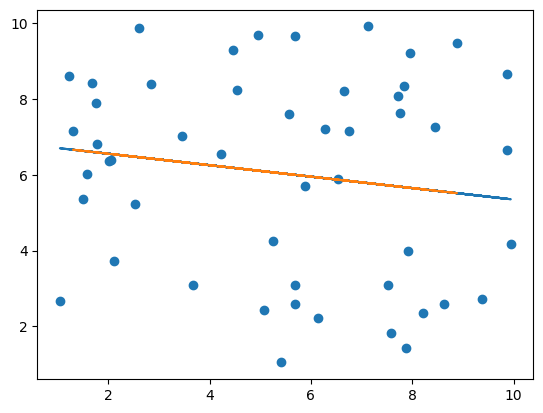

In [28]:
plt.scatter(x,y)

plt.plot(train_x,poly_1(train_x))

plt.plot(test_x, test_yhat_1)

plt.show()

In [29]:
mss = round(np.power(test_y-test_yhat_1,2).mean(),3)
mss

7.118

In [36]:
# Random Sampling v1
# by it we want to split our data into train data and test data
# this time we split data randomly

In [38]:
np.random.seed(42)

train_ids = np.random.choice(range(x.shape[0]), size = train_cnt, replace=False)

test_ids = np.setdiff1d(range(x.shape[0]),train_ids)

train_ids, test_ids

(array([13, 39, 30, 45, 17, 48, 26, 25, 32, 19, 12,  4, 37,  8,  3,  6, 41,
        46, 47, 15,  9, 16, 24, 34, 31,  0, 44, 27, 33,  5, 29, 11, 36,  1,
        21,  2, 43, 35, 23, 40]),
 array([ 7, 10, 14, 18, 20, 22, 28, 38, 42, 49]))

In [39]:
train_x, train_y = x[train_ids], y[train_ids]
test_x, test_y = x[test_ids], y[test_ids]

In [40]:
poly_1 = np.polyfit(train_x, train_y,1)
poly_1

array([-0.09874178,  6.44660816])

In [41]:
poly_1 = np.poly1d(poly_1)
poly_1

poly1d([-0.09874178,  6.44660816])

In [42]:
test_yhat_1 = poly_1(test_x)

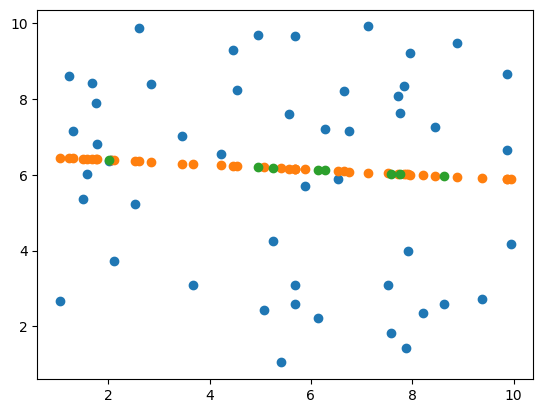

In [55]:
plt.scatter(x,y)

plt.scatter(train_x,poly_1(train_x))

plt.scatter(test_x, test_yhat_1)

plt.show()

In [45]:
mss = round(np.power(test_y-test_yhat_1,2).mean(),3)
mss

5.687

In [ ]:
# Random Sampling v2
# by it we want to split our data into train data and test data
# this time we split data randomly

In [46]:
np.random.seed(42)
train_array = np.random.choice([0,1], size = x.shape[0], p=[train_test_ratio, 1-train_test_ratio])
train_array

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0])

In [47]:
train_ids = np.arange(x.shape[0])[train_array==0]
test_ids = np.arange(x.shape[0])[train_array==1]
train_ids, test_ids

(array([ 0,  2,  3,  4,  5,  6,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40,
        41, 42, 44, 45, 46, 47, 48, 49]),
 array([ 1,  7, 11, 12, 33, 34, 35, 43]))

In [48]:
train_x, train_y = x[train_ids], y[train_ids]
test_x, test_y = x[test_ids], y[test_ids]

In [49]:
train_x.shape, test_x.shape

((42,), (8,))

In [50]:
poly_1 = np.polyfit(train_x, train_y,1)
poly_1

array([-0.06436946,  6.51747447])

In [51]:
poly_1 = np.poly1d(poly_1)
poly_1

poly1d([-0.06436946,  6.51747447])

In [52]:
test_yhat_1 = poly_1(test_x)

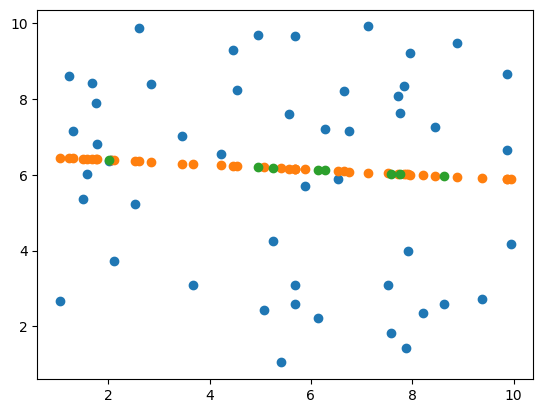

In [54]:
plt.scatter(x,y)

plt.scatter(train_x,poly_1(train_x))

plt.scatter(test_x, test_yhat_1)

plt.show()

In [56]:
mss = round(np.power(test_y-test_yhat_1,2).mean(),3)
mss

7.957

In [59]:
def reg_model(x,y,deg=1):
  reg_poly = np.polyfit(x,y,deg)
  reg_poly = np.poly1d(reg_poly)
  return reg_poly


poly_1 = reg_model(x,y)

yhat_1 = poly_1(x)


(poly1d([-0.11787609,  6.66266202]),
 array([5.77655255, 5.76809506, 6.13562634, 5.72525924, 5.73065219,
        5.9680564 , 5.49895093, 5.74729735, 5.73795944, 5.73348581,
        5.99171024, 5.64535917, 6.0430032 , 5.49042366, 5.86600824,
        6.45417304, 5.75320789, 5.49880559, 6.02462384, 6.47579246,
        6.45331585, 5.82191374, 5.66599031, 6.25494111, 6.53919247,
        6.42066794, 5.89292796, 6.06505086, 6.51697235, 5.5581562 ,
        5.99251628, 6.36536142, 6.00713492, 5.93889209, 6.07781755,
        6.42577716, 6.16364679, 6.48566847, 6.32700289, 6.35514781,
        6.23007409, 6.46381684, 6.5087413 , 5.92237706, 5.61560477,
        6.12648823, 5.993464  , 6.41276458, 5.69452034, 5.87739495]))